# Assignment 3 - kNN - due by `2pm on Thursday 4/4/2024`

In this assignment you will build and test a model for glass classification using kNN

`glass.csv` dataset contains 7 features that determine the glass type (e.g., the quantity of Mg: Magnesium, AI: Aluminum, Si: Silicon). The last column of the dataset is the type of glass (e.g., 1: windows float, 2: windows non-float, 3: vehicle float, 4: vehicle non-float, 5: containers, 6: tableware, 7: headlamps)

In [246]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [247]:
#load the dataset
df = pd.read_csv('glass.csv')
features = df.drop('Type', axis=1)
y = df['Type'].values

print("Features:\n", features.head(5))
print("Target (5 elements):\n", y[:5])

Features:
         RI     Na    Mg    Al     Si   Ba    Fe
0  1.51892  13.46  3.83  1.26  72.55  0.0  0.14
1  1.51673  13.30  3.64  1.53  72.53  0.0  0.29
2  1.51596  13.02  3.56  1.54  73.11  0.0  0.00
3  1.52210  13.73  3.84  0.72  71.76  0.0  0.00
4  1.51926  13.20  3.33  1.28  72.36  0.0  0.11
Target (5 elements):
 [2 2 2 1 1]


`1)` [5 pts] Feature Scaling
- Scaling is necessary for distance-based algorithms such as kNN. This is to prevent features with larger magnitudes from dominating the distance calculations.
- Use a standard scaler to scale the features (i.e., scale all columns except the last glass type column). Store the scaled features in a numpy variable called `X`.

In [248]:
# Write your code here


array([[ 0.18304402,  0.06401124,  0.7959975 , ..., -0.13062009,
        -0.35287683,  0.85371869],
       [-0.53978552, -0.13238167,  0.66396446, ..., -0.15650221,
        -0.35287683,  2.39675754],
       [-0.79393107, -0.47606926,  0.6083716 , ...,  0.5940795 ,
        -0.35287683, -0.5864509 ],
       ...,
       [-0.19322341, -0.24285268,  0.08718856, ...,  0.42584567,
        -0.35287683,  0.33937241],
       [-2.38151559,  4.87563749, -1.86551055, ...,  3.57052422,
        -0.35287683, -0.5864509 ],
       [-0.63880327, -1.53168114,  0.58057517, ...,  0.30937609,
        -0.35287683, -0.5864509 ]])

`2)` [10 pts] Split the data into training and testing sets. Use 80% of the data for training and 20% for testing. Store the split data into numpy variables called `X_train`, `X_test`, `y_train`, `y_test`.

<span style="color:red">**Note:**</span>
When splitting the dataset pass `shuffle=False` to the splitting function to avoid randomizing the data. This is important to get the same training and testing sets to ease grading.

Then `display` the shape and the first 4 rows of `X_train`, `X_test`, `y_train`, `y_test`.

In [249]:
# Write your code here

X_train (171, 7)
y_train (171,)
X_test (43, 7)
y_test (43,)
X_train
 [[ 0.18304402  0.06401124  0.7959975  -0.37122242 -0.13062009 -0.35287683
   0.85371869]
 [-0.53978552 -0.13238167  0.66396446  0.17083549 -0.15650221 -0.35287683
   2.39675754]
 [-0.79393107 -0.47606926  0.6083716   0.19091171  0.5940795  -0.35287683
  -0.5864509 ]
 [ 1.23263212  0.39542427  0.8029466  -1.45533824 -1.15296414 -0.35287683
  -0.5864509 ]]
y_train
 [2 2 2 1]
X_test
 [[-0.5892944   1.70880185 -1.86551055  1.09434156  0.5940795   3.09431342
  -0.5864509 ]
 [ 1.59569719  0.38314972  0.71955732 -1.87693884 -1.1659052  -0.35287683
   1.0594572 ]
 [ 1.57919423  0.03946213  0.45549124 -0.43145108 -0.35061817 -0.35287683
  -0.5864509 ]
 [-0.81373462 -0.72156039  0.58057517  0.91365559  0.2705529  -0.35287683
  -0.5864509 ]]
y_test
 [7 1 7 2]


`3)` [10 pts] Write a function `l1_distance` for calculating the manhattan distance between 2 arrays. The function should take 2 arrays as input and return the manhattan distance.

The manhattan distance is the sum of the absolute difference between the elements of the 2 arrays: $L_1(p,q)=\sum_{i=1}^d \big | p_i-q_i \big |$

In [250]:
# write a function that calculates the L1 distance between two 1 dimensional numpy array 
# Avoid using loops. Use numpy functions to calculate the L1 manhattan distance.

def l1_distance(p,q):
    #Write your code here


In [251]:
# Testing L1 function
p = np.array([2,3])
q = np.array([3,5])
print(f"Dimensionality of p: {p.shape[0]} & q: {q.shape[0]}")
d1 = l1_distance(p,q)
print(f"L1 distance: {d1:.2f}") #Prints 3

print("X_test 1st row:\n", X_test[0,:])
print("X_train 1st row:\n", X_train[0,:])

# Distance between the first row of X_test and the first row of X_train
d1 = l1_distance(X_test[0,:], X_train[0,:]) 
print(f"L1 distance: {d1:.2f}") #Prints 12.16

Dimensionality of p: 2 & q: 2
L1 distance: 3.00
X_test 1st row:
 [-0.5892944   1.70880185 -1.86551055  1.09434156  0.5940795   3.09431342
 -0.5864509 ]
X_train 1st row:
 [ 0.18304402  0.06401124  0.7959975  -0.37122242 -0.13062009 -0.35287683
  0.85371869]
L1 distance: 12.16


`4)` [10 pts] Write a function `l2_distance` for calculating the euclidean distance between 2 arrays. The function should take 2 arrays as input and return the euclidean distance.

$L_2(p,q)=\sqrt{\sum_{i=1}^d (p_i-q_i)^2}$

In [252]:
# Write a function that calculates the L2 distance between two 1 dimensional numpy array
# Avoid using loops. Use numpy functions to calculate the L2 euclidean distance.
def l2_distance(p,q):
    #Write your code here

In [253]:
# Testing L2 function
p = np.array([2,3])
q = np.array([3,5])
print(f"Dimensionality of p: {p.shape[0]} & q: {q.shape[0]}")
d2 = l2_distance(p,q)
print(f"L2 distance: {d2:.2f}") #Prints 2.24

print("X_test 1st row:\n", X_test[0,:])
print("X_train 1st row:\n", X_train[0,:])

# Distance between the first row of X_test and the first row of X_train
d2 = l2_distance(X_test[0,:], X_train[0,:]) 
print(f"L2 distance: {d2:.2f}") # Prints 5.2

Dimensionality of p: 2 & q: 2
L2 distance: 2.24
X_test 1st row:
 [-0.5892944   1.70880185 -1.86551055  1.09434156  0.5940795   3.09431342
 -0.5864509 ]
X_train 1st row:
 [ 0.18304402  0.06401124  0.7959975  -0.37122242 -0.13062009 -0.35287683
  0.85371869]
L2 distance: 5.20


`5.` [15pts] Write a function that finds the nearest neighbors using the L2 manhattan distance. The function should take 3 inputs: the training data X, the point p, and the value of k. The function should return the indices of the k-nearest neighbors of point p in X.

In [254]:
def find_knn(X, p, k=3):
    """
    Find the k nearest neighbors of point p in X using L2 distance
    Parameters:
    - X: numpy array of shape (n_samples, n_features) representing the dataset.
    - p: numpy array of shape (n_features,) representing the point of classify.
    - k: integer specifying the number of nearest neighbors to find.
    Returns the indices of the k nearest neighbors of point p in X.
    """
    # Number of points in X
    n = X.shape[0]
    # Write your code here

In [255]:
# Test find_knn function
k = 3
# Point to classify - 3rd row of the test set
p = X_test[2]
neighbors_indices = find_knn(X_train, p, k)

# Print the indices of the nearest neighbors
print(f"Indices of the {k} nearest neighbors of point p:")
print(neighbors_indices) # Should print [140 145 168]

# Print the nearest neighbors
print(f"\n{k} nearest neighbors of point p:")
print(X_train[neighbors_indices])

# Print the class labels of the k neighbors
print(f"\nClass labels of {k} nearest neighbors of point p:")
print(y_train[neighbors_indices])  # Should print [2 1 1]

Indices of the 3 nearest neighbors of point p:
[140 145 168]

3 nearest neighbors of point p:
[[ 1.1237126  -0.25512724  0.69176089 -0.59206083  0.12820119 -0.35287683
  -0.5864509 ]
 [ 1.52968536 -0.12010711  0.62226982 -1.25457605 -0.85531967 -0.35287683
  -0.27784313]
 [ 1.27553981 -0.24285268  0.75430285 -1.31480471 -0.85531967 -0.35287683
  -0.5864509 ]]

Class labels of 3 nearest neighbors of point p:
[2 1 1]


`5)` [10pts] Write a function `find_majority_label` that takes the indices of the k nearest neighbors and returns the majority label. 

In [256]:
# Find the majority label of the neighbors
# Tip: Use the mode function from the statistics package
def find_majority_label(neighbors_indices, y_train):
    # Write your code here

In [257]:
# Test find_majority_label function
y_pred = find_majority_label(neighbors_indices, y_train)
print(f"Predicted class of point p:", y_pred) # Should print 1

Predicted class of point p: 1


`6)` [15pts] KNN - Putting everything together.
Write a function `predict` that predicts the label of a given point. The function should take 3 inputs: the training data X_train, the labels y_train, and X_test. 
The function should return the predicted labels for X_test.

In [258]:
# Now you are ready to write your own KNN classifier
# This function takes the training and testing datasets, training labels, 
# and k=number of neighbors
# Returns an array of the predicted class labels for points in X_test.
# If X_test has n points, y_pred will be of shape (n,)
def predict(X_train, y_train, X_test, k=3):
    # Write your code here

Class labels of X_test and their frequency are:
 [[ 1.  2.  3.  5.  6.  7.]
 [20. 13.  1.  1.  2.  6.]]
Testing Accuracy: 0.74


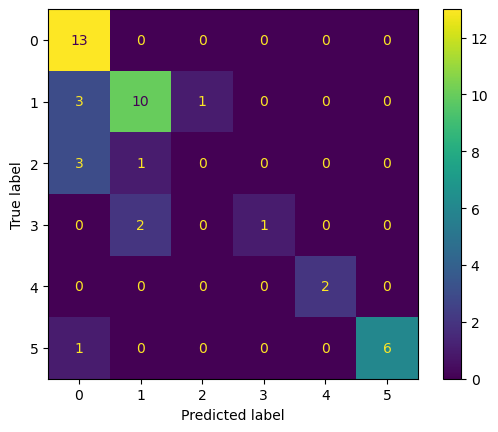

In [259]:
y_pred = predict(X_train, y_train, X_test, k=3)
# Get unique values and their frequency 
unique, frequency = np.unique(y_pred, return_counts = True) 
count = np.asarray((unique, frequency ))
""" Should print:
 [[ 1.  2.  3.  5.  6.  7.]
 [20. 13.  1.  1.  2.  6.]]
"""
print("Class labels of X_test and their frequency are:\n", count)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy:.2f}") # Should print 0.74

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

`5)` [10pts] Train and test a kNN model using SicketLearn's KNeighborsClassifier. Compare the accuracy of the two models.

The accuracy of SicketLearn's KNeighborsClassifier should be similar to the one returned by your own classifier.

In [260]:
# Write your code here

Testing Accuracy with L2 distance: 0.72


7) [15 pts] Evaluate the kNN for different values of k from 2 to 20 to find optimal k that returns the best accuracy.
- Use KNeighborsClassifier with Eclidean distance, p=2
- Evaluate the classifier on different values of k from 2 to 20 and find the best k
- Plot the model accuracy for each k

k= 2 Accuracy score: 0.6511627906976745
k= 3 Accuracy score: 0.7209302325581395
k= 4 Accuracy score: 0.6976744186046512
k= 5 Accuracy score: 0.6511627906976745
k= 6 Accuracy score: 0.6046511627906976
k= 7 Accuracy score: 0.627906976744186
k= 8 Accuracy score: 0.6046511627906976
k= 9 Accuracy score: 0.627906976744186
k= 10 Accuracy score: 0.5813953488372093
k= 11 Accuracy score: 0.5813953488372093
k= 12 Accuracy score: 0.5813953488372093
k= 13 Accuracy score: 0.5813953488372093
k= 14 Accuracy score: 0.5813953488372093
k= 15 Accuracy score: 0.6046511627906976
k= 16 Accuracy score: 0.6046511627906976
k= 17 Accuracy score: 0.5813953488372093
k= 18 Accuracy score: 0.6046511627906976
k= 19 Accuracy score: 0.6046511627906976
k= 20 Accuracy score: 0.6046511627906976
Best k:  3


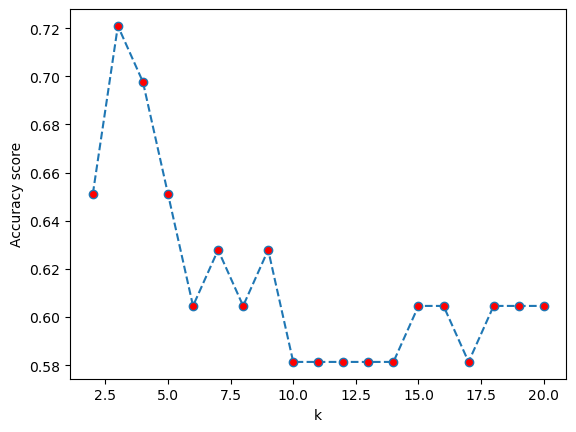

In [264]:
# Write your code here

In [262]:
# Train  KNeighborsClassifier using best_k and p=2
# Test the model on X_test
model = KNeighborsClassifier(n_neighbors=best_k, p=2)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy:.2f}") # Should print 0.72

Testing Accuracy: 0.72
